In [4]:
import tensorflow as tf
from utilities import model_creation, metrics_and_plots, data_processing
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
# Let's see our luck
print("We are running {} version of the TensorFlow,\nand we have {} GPUs Available.".format(
    tf.__version__, len(tf.config.list_physical_devices('GPU'))))

We are running 2.7.0 version of the TensorFlow,
and we have 1 GPUs Available.


In [5]:


target_size = (128, 128)
batch_size = 32
epochs = 50
input_shape = (128, 128, 3)

METRICS = [
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.FalseNegatives(name='fn'), 
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
    tf.keras.metrics.SpecificityAtSensitivity(sensitivity=0.5, name = 'Specificity'),
    tf.keras.metrics.SensitivityAtSpecificity(specificity=0.5, name = 'Sensitivity')
]

In [6]:


train_dir = "D:/Datasets/DiabeticRetinopathy/APTOS_Dataset/APTOS_Enhanced/train"
test_dir = "D:/Datasets/DiabeticRetinopathy/APTOS_Dataset/APTOS_Enhanced/test"
val_dir = "D:/Datasets/DiabeticRetinopathy/APTOS_Dataset/APTOS_Enhanced/validation/"


train_iterator = data_processing.generate_iterator(path=train_dir, augmentation = True, 
                                                   rescale = 0, target_size=target_size,
                                                   batch_size = batch_size)
test_iterator = data_processing.generate_iterator(path=test_dir, augmentation=False, 
                                                  shuffle=False, rescale=0, target_size=target_size,
                                                 batch_size = batch_size)
validation_iterator = data_processing.generate_iterator(path=val_dir, augmentation=False, 
                                                        shuffle=False, rescale=0, target_size=target_size,
                                                       batch_size = batch_size)

# data_processing.display_images(train_iterator)

Found 2913 images belonging to 5 classes.
Found 364 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [7]:
# Let's define the callbacks to save the model and reduce the learning rate
import os

## FOR ENHANCED DATASET
save_dir_for_enhanced = os.path.join(os.getcwd(), 'Saved_Model_For_APTOS')
model_name_for_enhanced = 'Model_For_APTOS'
if not os.path.isdir(save_dir_for_enhanced):
    os.makedirs(save_dir_for_enhanced)
filepath_for_enhanced = os.path.join(save_dir_for_enhanced, model_name_for_enhanced)

# prepare callbacks for model saving and for learning rate adjustment.
checkpoint_for_enhanced = ModelCheckpoint(filepath=filepath_for_enhanced,
                                          monitor= 'val_Specificity',
                                          verbose=1,
                                          save_best_only=False,
                                          save_weights_only=False,
                                          mode = 'max')


CSVLogger_for_enhanced = CSVLogger(filename='CSVLogger_For_APTOS', separator=',',
                                  append=False)

lr_reducer = ReduceLROnPlateau(factor=0.5,
                               cooldown=0,
                               patience=5,
                               min_lr=0.1e-6,
                               monitor = 'val_Specificity',
                               mode = 'max')


callbacks_for_enhanced = [checkpoint_for_enhanced, lr_reducer, CSVLogger_for_enhanced]

In [8]:
model = model_creation.final_model(input_shape=input_shape, num_classes=5, blocks  = 4)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                           loss = tf.keras.losses.CategoricalCrossentropy(),
                           metrics = METRICS)
# plot_model(model, show_shapes=True)
history = model.fit(x = train_iterator, epochs = epochs, 
                    validation_data=validation_iterator, 
                    callbacks=callbacks_for_enhanced,
                   batch_size = batch_size)

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 1.3761 - tp: 1429.0000 - fp: 733.0000 - tn: 10919.0000 - fn: 1484.0000 - accuracy: 0.8478 - precision: 0.6610 - recall: 0.4906 - auc: 0.8195 - prc: 0.5986 - Specificity: 0.9323 - Sensitivity: 0.8764
Epoch 00001: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 76s 685ms/step - loss: 1.3761 - tp: 1429.0000 - fp: 733.0000 - tn: 10919.0000 - fn: 1484.0000 - accuracy: 0.8478 - precision: 0.6610 - recall: 0.4906 - auc: 0.8195 - prc: 0.5986 - Specificity: 0.9323 - Sensitivity: 0.8764 - val_loss: 1.0650 - val_tp: 219.0000 - val_fp: 85.0000 - val_tn: 1371.0000 - val_fn: 145.0000 - val_accuracy: 0.8736 - val_precision: 0.7204 - val_recall: 0.6016 - val_auc: 0.8611 - val_prc: 0.6

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 0.9538 - tp: 1677.0000 - fp: 514.0000 - tn: 11138.0000 - fn: 1236.0000 - accuracy: 0.8798 - precision: 0.7654 - recall: 0.5757 - auc: 0.8880 - prc: 0.7479 - Specificity: 0.9736 - Sensitivity: 0.9406
Epoch 00002: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 50s 539ms/step - loss: 0.9538 - tp: 1677.0000 - fp: 514.0000 - tn: 11138.0000 - fn: 1236.0000 - accuracy: 0.8798 - precision: 0.7654 - recall: 0.5757 - auc: 0.8880 - prc: 0.7479 - Specificity: 0.9736 - Sensitivity: 0.9406 - val_loss: 0.7952 - val_tp: 222.0000 - val_fp: 53.0000 - val_tn: 1403.0000 - val_fn: 142.0000 - val_accuracy: 0.8929 - val_precision: 0.8073 - val_recall: 0.6099 - val_auc: 0.9186 - val_prc: 0.8

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 0.8707 - tp: 1709.0000 - fp: 496.0000 - tn: 11156.0000 - fn: 1204.0000 - accuracy: 0.8833 - precision: 0.7751 - recall: 0.5867 - auc: 0.9051 - prc: 0.7765 - Specificity: 0.9803 - Sensitivity: 0.9629
Epoch 00003: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 551ms/step - loss: 0.8707 - tp: 1709.0000 - fp: 496.0000 - tn: 11156.0000 - fn: 1204.0000 - accuracy: 0.8833 - precision: 0.7751 - recall: 0.5867 - auc: 0.9051 - prc: 0.7765 - Specificity: 0.9803 - Sensitivity: 0.9629 - val_loss: 0.9525 - val_tp: 183.0000 - val_fp: 75.0000 - val_tn: 1381.0000 - val_fn: 181.0000 - val_accuracy: 0.8593 - val_precision: 0.7093 - val_recall: 0.5027 - val_auc: 0.8932 - val_prc: 0.7

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 0.8654 - tp: 1664.0000 - fp: 486.0000 - tn: 11166.0000 - fn: 1249.0000 - accuracy: 0.8809 - precision: 0.7740 - recall: 0.5712 - auc: 0.9051 - prc: 0.7725 - Specificity: 0.9762 - Sensitivity: 0.9684
Epoch 00004: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 52s 568ms/step - loss: 0.8654 - tp: 1664.0000 - fp: 486.0000 - tn: 11166.0000 - fn: 1249.0000 - accuracy: 0.8809 - precision: 0.7740 - recall: 0.5712 - auc: 0.9051 - prc: 0.7725 - Specificity: 0.9762 - Sensitivity: 0.9684 - val_loss: 0.8391 - val_tp: 208.0000 - val_fp: 54.0000 - val_tn: 1402.0000 - val_fn: 156.0000 - val_accuracy: 0.8846 - val_precision: 0.7939 - val_recall: 0.5714 - val_auc: 0.9112 - val_prc: 0.7

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 5/50
92/92 [==============================] - ETA: 0s - loss: 0.8208 - tp: 1726.0000 - fp: 438.0000 - tn: 11214.0000 - fn: 1187.0000 - accuracy: 0.8884 - precision: 0.7976 - recall: 0.5925 - auc: 0.9148 - prc: 0.7920 - Specificity: 0.9833 - Sensitivity: 0.9722
Epoch 00005: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 52s 566ms/step - loss: 0.8208 - tp: 1726.0000 - fp: 438.0000 - tn: 11214.0000 - fn: 1187.0000 - accuracy: 0.8884 - precision: 0.7976 - recall: 0.5925 - auc: 0.9148 - prc: 0.7920 - Specificity: 0.9833 - Sensitivity: 0.9722 - val_loss: 0.7823 - val_tp: 224.0000 - val_fp: 54.0000 - val_tn: 1402.0000 - val_fn: 140.0000 - val_accuracy: 0.8934 - val_precision: 0.8058 - val_recall: 0.6154 - val_auc: 0.9225 - val_prc: 0.8

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 6/50
92/92 [==============================] - ETA: 0s - loss: 0.8202 - tp: 1734.0000 - fp: 399.0000 - tn: 11253.0000 - fn: 1179.0000 - accuracy: 0.8917 - precision: 0.8129 - recall: 0.5953 - auc: 0.9145 - prc: 0.7976 - Specificity: 0.9849 - Sensitivity: 0.9664
Epoch 00006: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 553ms/step - loss: 0.8202 - tp: 1734.0000 - fp: 399.0000 - tn: 11253.0000 - fn: 1179.0000 - accuracy: 0.8917 - precision: 0.8129 - recall: 0.5953 - auc: 0.9145 - prc: 0.7976 - Specificity: 0.9849 - Sensitivity: 0.9664 - val_loss: 0.8026 - val_tp: 223.0000 - val_fp: 59.0000 - val_tn: 1397.0000 - val_fn: 141.0000 - val_accuracy: 0.8901 - val_precision: 0.7908 - val_recall: 0.6126 - val_auc: 0.9187 - val_prc: 0.8

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 7/50
92/92 [==============================] - ETA: 0s - loss: 0.8038 - tp: 1715.0000 - fp: 411.0000 - tn: 11241.0000 - fn: 1198.0000 - accuracy: 0.8895 - precision: 0.8067 - recall: 0.5887 - auc: 0.9183 - prc: 0.8015 - Specificity: 0.9834 - Sensitivity: 0.9715
Epoch 00007: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 554ms/step - loss: 0.8038 - tp: 1715.0000 - fp: 411.0000 - tn: 11241.0000 - fn: 1198.0000 - accuracy: 0.8895 - precision: 0.8067 - recall: 0.5887 - auc: 0.9183 - prc: 0.8015 - Specificity: 0.9834 - Sensitivity: 0.9715 - val_loss: 0.7914 - val_tp: 220.0000 - val_fp: 47.0000 - val_tn: 1409.0000 - val_fn: 144.0000 - val_accuracy: 0.8951 - val_precision: 0.8240 - val_recall: 0.6044 - val_auc: 0.9224 - val_prc: 0.8

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 8/50
92/92 [==============================] - ETA: 0s - loss: 0.8380 - tp: 1683.0000 - fp: 418.0000 - tn: 11234.0000 - fn: 1230.0000 - accuracy: 0.8869 - precision: 0.8010 - recall: 0.5778 - auc: 0.9115 - prc: 0.7881 - Specificity: 0.9812 - Sensitivity: 0.9681
Epoch 00008: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 52s 568ms/step - loss: 0.8380 - tp: 1683.0000 - fp: 418.0000 - tn: 11234.0000 - fn: 1230.0000 - accuracy: 0.8869 - precision: 0.8010 - recall: 0.5778 - auc: 0.9115 - prc: 0.7881 - Specificity: 0.9812 - Sensitivity: 0.9681 - val_loss: 1.1866 - val_tp: 216.0000 - val_fp: 101.0000 - val_tn: 1355.0000 - val_fn: 148.0000 - val_accuracy: 0.8632 - val_precision: 0.6814 - val_recall: 0.5934 - val_auc: 0.8549 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 9/50
92/92 [==============================] - ETA: 0s - loss: 0.8501 - tp: 1762.0000 - fp: 468.0000 - tn: 11184.0000 - fn: 1151.0000 - accuracy: 0.8888 - precision: 0.7901 - recall: 0.6049 - auc: 0.9108 - prc: 0.7895 - Specificity: 0.9821 - Sensitivity: 0.9588
Epoch 00009: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 549ms/step - loss: 0.8501 - tp: 1762.0000 - fp: 468.0000 - tn: 11184.0000 - fn: 1151.0000 - accuracy: 0.8888 - precision: 0.7901 - recall: 0.6049 - auc: 0.9108 - prc: 0.7895 - Specificity: 0.9821 - Sensitivity: 0.9588 - val_loss: 0.8696 - val_tp: 226.0000 - val_fp: 78.0000 - val_tn: 1378.0000 - val_fn: 138.0000 - val_accuracy: 0.8813 - val_precision: 0.7434 - val_recall: 0.6209 - val_auc: 0.9091 - val_prc: 0.7

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 10/50
92/92 [==============================] - ETA: 0s - loss: 0.8354 - tp: 1739.0000 - fp: 441.0000 - tn: 11211.0000 - fn: 1174.0000 - accuracy: 0.8891 - precision: 0.7977 - recall: 0.5970 - auc: 0.9126 - prc: 0.7920 - Specificity: 0.9829 - Sensitivity: 0.9691
Epoch 00010: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 50s 545ms/step - loss: 0.8354 - tp: 1739.0000 - fp: 441.0000 - tn: 11211.0000 - fn: 1174.0000 - accuracy: 0.8891 - precision: 0.7977 - recall: 0.5970 - auc: 0.9126 - prc: 0.7920 - Specificity: 0.9829 - Sensitivity: 0.9691 - val_loss: 0.9706 - val_tp: 219.0000 - val_fp: 71.0000 - val_tn: 1385.0000 - val_fn: 145.0000 - val_accuracy: 0.8813 - val_precision: 0.7552 - val_recall: 0.6016 - val_auc: 0.8892 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 11/50
92/92 [==============================] - ETA: 0s - loss: 0.8284 - tp: 1744.0000 - fp: 447.0000 - tn: 11205.0000 - fn: 1169.0000 - accuracy: 0.8890 - precision: 0.7960 - recall: 0.5987 - auc: 0.9129 - prc: 0.7912 - Specificity: 0.9805 - Sensitivity: 0.9701
Epoch 00011: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 547ms/step - loss: 0.8284 - tp: 1744.0000 - fp: 447.0000 - tn: 11205.0000 - fn: 1169.0000 - accuracy: 0.8890 - precision: 0.7960 - recall: 0.5987 - auc: 0.9129 - prc: 0.7912 - Specificity: 0.9805 - Sensitivity: 0.9701 - val_loss: 0.7952 - val_tp: 206.0000 - val_fp: 39.0000 - val_tn: 1417.0000 - val_fn: 158.0000 - val_accuracy: 0.8918 - val_precision: 0.8408 - val_recall: 0.5659 - val_auc: 0.9232 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 12/50
92/92 [==============================] - ETA: 0s - loss: 0.8792 - tp: 1735.0000 - fp: 442.0000 - tn: 11210.0000 - fn: 1178.0000 - accuracy: 0.8888 - precision: 0.7970 - recall: 0.5956 - auc: 0.9134 - prc: 0.7902 - Specificity: 0.9827 - Sensitivity: 0.9708
Epoch 00012: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 553ms/step - loss: 0.8792 - tp: 1735.0000 - fp: 442.0000 - tn: 11210.0000 - fn: 1178.0000 - accuracy: 0.8888 - precision: 0.7970 - recall: 0.5956 - auc: 0.9134 - prc: 0.7902 - Specificity: 0.9827 - Sensitivity: 0.9708 - val_loss: 0.8278 - val_tp: 196.0000 - val_fp: 38.0000 - val_tn: 1418.0000 - val_fn: 168.0000 - val_accuracy: 0.8868 - val_precision: 0.8376 - val_recall: 0.5385 - val_auc: 0.9135 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 13/50
92/92 [==============================] - ETA: 0s - loss: 0.8085 - tp: 1714.0000 - fp: 403.0000 - tn: 11249.0000 - fn: 1199.0000 - accuracy: 0.8900 - precision: 0.8096 - recall: 0.5884 - auc: 0.9169 - prc: 0.8000 - Specificity: 0.9844 - Sensitivity: 0.9725
Epoch 00013: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 551ms/step - loss: 0.8085 - tp: 1714.0000 - fp: 403.0000 - tn: 11249.0000 - fn: 1199.0000 - accuracy: 0.8900 - precision: 0.8096 - recall: 0.5884 - auc: 0.9169 - prc: 0.8000 - Specificity: 0.9844 - Sensitivity: 0.9725 - val_loss: 0.7652 - val_tp: 194.0000 - val_fp: 27.0000 - val_tn: 1429.0000 - val_fn: 170.0000 - val_accuracy: 0.8918 - val_precision: 0.8778 - val_recall: 0.5330 - val_auc: 0.9269 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 14/50
92/92 [==============================] - ETA: 0s - loss: 0.7794 - tp: 1746.0000 - fp: 407.0000 - tn: 11245.0000 - fn: 1167.0000 - accuracy: 0.8919 - precision: 0.8110 - recall: 0.5994 - auc: 0.9233 - prc: 0.8081 - Specificity: 0.9858 - Sensitivity: 0.9791
Epoch 00014: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 50s 546ms/step - loss: 0.7794 - tp: 1746.0000 - fp: 407.0000 - tn: 11245.0000 - fn: 1167.0000 - accuracy: 0.8919 - precision: 0.8110 - recall: 0.5994 - auc: 0.9233 - prc: 0.8081 - Specificity: 0.9858 - Sensitivity: 0.9791 - val_loss: 0.8095 - val_tp: 234.0000 - val_fp: 76.0000 - val_tn: 1380.0000 - val_fn: 130.0000 - val_accuracy: 0.8868 - val_precision: 0.7548 - val_recall: 0.6429 - val_auc: 0.9176 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 15/50
92/92 [==============================] - ETA: 0s - loss: 0.7707 - tp: 1767.0000 - fp: 418.0000 - tn: 11234.0000 - fn: 1146.0000 - accuracy: 0.8926 - precision: 0.8087 - recall: 0.6066 - auc: 0.9249 - prc: 0.8122 - Specificity: 0.9864 - Sensitivity: 0.9739
Epoch 00015: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 548ms/step - loss: 0.7707 - tp: 1767.0000 - fp: 418.0000 - tn: 11234.0000 - fn: 1146.0000 - accuracy: 0.8926 - precision: 0.8087 - recall: 0.6066 - auc: 0.9249 - prc: 0.8122 - Specificity: 0.9864 - Sensitivity: 0.9739 - val_loss: 0.7371 - val_tp: 232.0000 - val_fp: 60.0000 - val_tn: 1396.0000 - val_fn: 132.0000 - val_accuracy: 0.8945 - val_precision: 0.7945 - val_recall: 0.6374 - val_auc: 0.9315 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 16/50
92/92 [==============================] - ETA: 0s - loss: 0.7401 - tp: 1810.0000 - fp: 405.0000 - tn: 11247.0000 - fn: 1103.0000 - accuracy: 0.8965 - precision: 0.8172 - recall: 0.6214 - auc: 0.9305 - prc: 0.8226 - Specificity: 0.9882 - Sensitivity: 0.9832
Epoch 00016: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 50s 544ms/step - loss: 0.7401 - tp: 1810.0000 - fp: 405.0000 - tn: 11247.0000 - fn: 1103.0000 - accuracy: 0.8965 - precision: 0.8172 - recall: 0.6214 - auc: 0.9305 - prc: 0.8226 - Specificity: 0.9882 - Sensitivity: 0.9832 - val_loss: 0.7290 - val_tp: 215.0000 - val_fp: 35.0000 - val_tn: 1421.0000 - val_fn: 149.0000 - val_accuracy: 0.8989 - val_precision: 0.8600 - val_recall: 0.5907 - val_auc: 0.9359 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 17/50
92/92 [==============================] - ETA: 0s - loss: 0.7267 - tp: 1870.0000 - fp: 397.0000 - tn: 11255.0000 - fn: 1043.0000 - accuracy: 0.9011 - precision: 0.8249 - recall: 0.6419 - auc: 0.9334 - prc: 0.8295 - Specificity: 0.9875 - Sensitivity: 0.9832
Epoch 00017: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 547ms/step - loss: 0.7267 - tp: 1870.0000 - fp: 397.0000 - tn: 11255.0000 - fn: 1043.0000 - accuracy: 0.9011 - precision: 0.8249 - recall: 0.6419 - auc: 0.9334 - prc: 0.8295 - Specificity: 0.9875 - Sensitivity: 0.9832 - val_loss: 0.6854 - val_tp: 237.0000 - val_fp: 51.0000 - val_tn: 1405.0000 - val_fn: 127.0000 - val_accuracy: 0.9022 - val_precision: 0.8229 - val_recall: 0.6511 - val_auc: 0.9405 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 18/50
92/92 [==============================] - ETA: 0s - loss: 0.7302 - tp: 1848.0000 - fp: 447.0000 - tn: 11205.0000 - fn: 1065.0000 - accuracy: 0.8962 - precision: 0.8052 - recall: 0.6344 - auc: 0.9328 - prc: 0.8262 - Specificity: 0.9883 - Sensitivity: 0.9825
Epoch 00018: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 549ms/step - loss: 0.7302 - tp: 1848.0000 - fp: 447.0000 - tn: 11205.0000 - fn: 1065.0000 - accuracy: 0.8962 - precision: 0.8052 - recall: 0.6344 - auc: 0.9328 - prc: 0.8262 - Specificity: 0.9883 - Sensitivity: 0.9825 - val_loss: 0.7331 - val_tp: 245.0000 - val_fp: 66.0000 - val_tn: 1390.0000 - val_fn: 119.0000 - val_accuracy: 0.8984 - val_precision: 0.7878 - val_recall: 0.6731 - val_auc: 0.9322 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 19/50
92/92 [==============================] - ETA: 0s - loss: 0.7319 - tp: 1863.0000 - fp: 430.0000 - tn: 11222.0000 - fn: 1050.0000 - accuracy: 0.8984 - precision: 0.8125 - recall: 0.6395 - auc: 0.9321 - prc: 0.8264 - Specificity: 0.9875 - Sensitivity: 0.9791
Epoch 00019: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 552ms/step - loss: 0.7319 - tp: 1863.0000 - fp: 430.0000 - tn: 11222.0000 - fn: 1050.0000 - accuracy: 0.8984 - precision: 0.8125 - recall: 0.6395 - auc: 0.9321 - prc: 0.8264 - Specificity: 0.9875 - Sensitivity: 0.9791 - val_loss: 0.6887 - val_tp: 254.0000 - val_fp: 64.0000 - val_tn: 1392.0000 - val_fn: 110.0000 - val_accuracy: 0.9044 - val_precision: 0.7987 - val_recall: 0.6978 - val_auc: 0.9391 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 20/50
92/92 [==============================] - ETA: 0s - loss: 0.7078 - tp: 1928.0000 - fp: 434.0000 - tn: 11218.0000 - fn: 985.0000 - accuracy: 0.9026 - precision: 0.8163 - recall: 0.6619 - auc: 0.9365 - prc: 0.8352 - Specificity: 0.9881 - Sensitivity: 0.9852
Epoch 00020: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 554ms/step - loss: 0.7078 - tp: 1928.0000 - fp: 434.0000 - tn: 11218.0000 - fn: 985.0000 - accuracy: 0.9026 - precision: 0.8163 - recall: 0.6619 - auc: 0.9365 - prc: 0.8352 - Specificity: 0.9881 - Sensitivity: 0.9852 - val_loss: 0.6788 - val_tp: 239.0000 - val_fp: 50.0000 - val_tn: 1406.0000 - val_fn: 125.0000 - val_accuracy: 0.9038 - val_precision: 0.8270 - val_recall: 0.6566 - val_auc: 0.9418 - val_prc: 0.84

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 21/50
92/92 [==============================] - ETA: 0s - loss: 0.6900 - tp: 1911.0000 - fp: 441.0000 - tn: 11211.0000 - fn: 1002.0000 - accuracy: 0.9009 - precision: 0.8125 - recall: 0.6560 - auc: 0.9396 - prc: 0.8405 - Specificity: 0.9895 - Sensitivity: 0.9873
Epoch 00021: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 555ms/step - loss: 0.6900 - tp: 1911.0000 - fp: 441.0000 - tn: 11211.0000 - fn: 1002.0000 - accuracy: 0.9009 - precision: 0.8125 - recall: 0.6560 - auc: 0.9396 - prc: 0.8405 - Specificity: 0.9895 - Sensitivity: 0.9873 - val_loss: 0.6860 - val_tp: 240.0000 - val_fp: 44.0000 - val_tn: 1412.0000 - val_fn: 124.0000 - val_accuracy: 0.9077 - val_precision: 0.8451 - val_recall: 0.6593 - val_auc: 0.9406 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 22/50
92/92 [==============================] - ETA: 0s - loss: 0.7179 - tp: 1889.0000 - fp: 446.0000 - tn: 11206.0000 - fn: 1024.0000 - accuracy: 0.8991 - precision: 0.8090 - recall: 0.6485 - auc: 0.9349 - prc: 0.8321 - Specificity: 0.9888 - Sensitivity: 0.9808
Epoch 00022: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 547ms/step - loss: 0.7179 - tp: 1889.0000 - fp: 446.0000 - tn: 11206.0000 - fn: 1024.0000 - accuracy: 0.8991 - precision: 0.8090 - recall: 0.6485 - auc: 0.9349 - prc: 0.8321 - Specificity: 0.9888 - Sensitivity: 0.9808 - val_loss: 0.7099 - val_tp: 236.0000 - val_fp: 43.0000 - val_tn: 1413.0000 - val_fn: 128.0000 - val_accuracy: 0.9060 - val_precision: 0.8459 - val_recall: 0.6484 - val_auc: 0.9369 - val_prc: 0.

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 23/50
92/92 [==============================] - ETA: 0s - loss: 0.6855 - tp: 1948.0000 - fp: 412.0000 - tn: 11240.0000 - fn: 965.0000 - accuracy: 0.9055 - precision: 0.8254 - recall: 0.6687 - auc: 0.9406 - prc: 0.8437 - Specificity: 0.9894 - Sensitivity: 0.9897
Epoch 00023: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 550ms/step - loss: 0.6855 - tp: 1948.0000 - fp: 412.0000 - tn: 11240.0000 - fn: 965.0000 - accuracy: 0.9055 - precision: 0.8254 - recall: 0.6687 - auc: 0.9406 - prc: 0.8437 - Specificity: 0.9894 - Sensitivity: 0.9897 - val_loss: 0.6883 - val_tp: 242.0000 - val_fp: 61.0000 - val_tn: 1395.0000 - val_fn: 122.0000 - val_accuracy: 0.8995 - val_precision: 0.7987 - val_recall: 0.6648 - val_auc: 0.9400 - val_prc: 0.84

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 24/50
92/92 [==============================] - ETA: 0s - loss: 0.6578 - tp: 1975.0000 - fp: 431.0000 - tn: 11221.0000 - fn: 938.0000 - accuracy: 0.9060 - precision: 0.8209 - recall: 0.6780 - auc: 0.9450 - prc: 0.8527 - Specificity: 0.9912 - Sensitivity: 0.9904
Epoch 00024: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 555ms/step - loss: 0.6578 - tp: 1975.0000 - fp: 431.0000 - tn: 11221.0000 - fn: 938.0000 - accuracy: 0.9060 - precision: 0.8209 - recall: 0.6780 - auc: 0.9450 - prc: 0.8527 - Specificity: 0.9912 - Sensitivity: 0.9904 - val_loss: 0.6450 - val_tp: 237.0000 - val_fp: 42.0000 - val_tn: 1414.0000 - val_fn: 127.0000 - val_accuracy: 0.9071 - val_precision: 0.8495 - val_recall: 0.6511 - val_auc: 0.9487 - val_prc: 0.86

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 25/50
92/92 [==============================] - ETA: 0s - loss: 0.6414 - tp: 2001.0000 - fp: 412.0000 - tn: 11240.0000 - fn: 912.0000 - accuracy: 0.9091 - precision: 0.8293 - recall: 0.6869 - auc: 0.9480 - prc: 0.8575 - Specificity: 0.9911 - Sensitivity: 0.9924
Epoch 00025: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 552ms/step - loss: 0.6414 - tp: 2001.0000 - fp: 412.0000 - tn: 11240.0000 - fn: 912.0000 - accuracy: 0.9091 - precision: 0.8293 - recall: 0.6869 - auc: 0.9480 - prc: 0.8575 - Specificity: 0.9911 - Sensitivity: 0.9924 - val_loss: 0.6644 - val_tp: 246.0000 - val_fp: 42.0000 - val_tn: 1414.0000 - val_fn: 118.0000 - val_accuracy: 0.9121 - val_precision: 0.8542 - val_recall: 0.6758 - val_auc: 0.9436 - val_prc: 0.85

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 26/50
92/92 [==============================] - ETA: 0s - loss: 0.6517 - tp: 1972.0000 - fp: 440.0000 - tn: 11212.0000 - fn: 941.0000 - accuracy: 0.9052 - precision: 0.8176 - recall: 0.6770 - auc: 0.9462 - prc: 0.8534 - Specificity: 0.9911 - Sensitivity: 0.9911
Epoch 00026: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 547ms/step - loss: 0.6517 - tp: 1972.0000 - fp: 440.0000 - tn: 11212.0000 - fn: 941.0000 - accuracy: 0.9052 - precision: 0.8176 - recall: 0.6770 - auc: 0.9462 - prc: 0.8534 - Specificity: 0.9911 - Sensitivity: 0.9911 - val_loss: 0.6588 - val_tp: 238.0000 - val_fp: 43.0000 - val_tn: 1413.0000 - val_fn: 126.0000 - val_accuracy: 0.9071 - val_precision: 0.8470 - val_recall: 0.6538 - val_auc: 0.9468 - val_prc: 0.86

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 27/50
92/92 [==============================] - ETA: 0s - loss: 0.6234 - tp: 2033.0000 - fp: 409.0000 - tn: 11243.0000 - fn: 880.0000 - accuracy: 0.9115 - precision: 0.8325 - recall: 0.6979 - auc: 0.9508 - prc: 0.8642 - Specificity: 0.9921 - Sensitivity: 0.9918
Epoch 00027: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 553ms/step - loss: 0.6234 - tp: 2033.0000 - fp: 409.0000 - tn: 11243.0000 - fn: 880.0000 - accuracy: 0.9115 - precision: 0.8325 - recall: 0.6979 - auc: 0.9508 - prc: 0.8642 - Specificity: 0.9921 - Sensitivity: 0.9918 - val_loss: 0.6263 - val_tp: 256.0000 - val_fp: 47.0000 - val_tn: 1409.0000 - val_fn: 108.0000 - val_accuracy: 0.9148 - val_precision: 0.8449 - val_recall: 0.7033 - val_auc: 0.9500 - val_prc: 0.86

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 28/50
92/92 [==============================] - ETA: 0s - loss: 0.6456 - tp: 2029.0000 - fp: 449.0000 - tn: 11203.0000 - fn: 884.0000 - accuracy: 0.9085 - precision: 0.8188 - recall: 0.6965 - auc: 0.9473 - prc: 0.8579 - Specificity: 0.9912 - Sensitivity: 0.9924
Epoch 00028: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 555ms/step - loss: 0.6456 - tp: 2029.0000 - fp: 449.0000 - tn: 11203.0000 - fn: 884.0000 - accuracy: 0.9085 - precision: 0.8188 - recall: 0.6965 - auc: 0.9473 - prc: 0.8579 - Specificity: 0.9912 - Sensitivity: 0.9924 - val_loss: 0.7222 - val_tp: 253.0000 - val_fp: 62.0000 - val_tn: 1394.0000 - val_fn: 111.0000 - val_accuracy: 0.9049 - val_precision: 0.8032 - val_recall: 0.6951 - val_auc: 0.9360 - val_prc: 0.83

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 29/50
92/92 [==============================] - ETA: 0s - loss: 0.6679 - tp: 1946.0000 - fp: 422.0000 - tn: 11230.0000 - fn: 967.0000 - accuracy: 0.9046 - precision: 0.8218 - recall: 0.6680 - auc: 0.9437 - prc: 0.8501 - Specificity: 0.9906 - Sensitivity: 0.9880
Epoch 00029: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 52s 568ms/step - loss: 0.6679 - tp: 1946.0000 - fp: 422.0000 - tn: 11230.0000 - fn: 967.0000 - accuracy: 0.9046 - precision: 0.8218 - recall: 0.6680 - auc: 0.9437 - prc: 0.8501 - Specificity: 0.9906 - Sensitivity: 0.9880 - val_loss: 0.6264 - val_tp: 231.0000 - val_fp: 38.0000 - val_tn: 1418.0000 - val_fn: 133.0000 - val_accuracy: 0.9060 - val_precision: 0.8587 - val_recall: 0.6346 - val_auc: 0.9518 - val_prc: 0.86

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 30/50
92/92 [==============================] - ETA: 0s - loss: 0.6336 - tp: 1999.0000 - fp: 426.0000 - tn: 11226.0000 - fn: 914.0000 - accuracy: 0.9080 - precision: 0.8243 - recall: 0.6862 - auc: 0.9494 - prc: 0.8592 - Specificity: 0.9909 - Sensitivity: 0.9914
Epoch 00030: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 52s 558ms/step - loss: 0.6336 - tp: 1999.0000 - fp: 426.0000 - tn: 11226.0000 - fn: 914.0000 - accuracy: 0.9080 - precision: 0.8243 - recall: 0.6862 - auc: 0.9494 - prc: 0.8592 - Specificity: 0.9909 - Sensitivity: 0.9914 - val_loss: 0.6105 - val_tp: 259.0000 - val_fp: 44.0000 - val_tn: 1412.0000 - val_fn: 105.0000 - val_accuracy: 0.9181 - val_precision: 0.8548 - val_recall: 0.7115 - val_auc: 0.9529 - val_prc: 0.87

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 31/50
92/92 [==============================] - ETA: 0s - loss: 0.6285 - tp: 2012.0000 - fp: 441.0000 - tn: 11211.0000 - fn: 901.0000 - accuracy: 0.9079 - precision: 0.8202 - recall: 0.6907 - auc: 0.9499 - prc: 0.8614 - Specificity: 0.9926 - Sensitivity: 0.9931
Epoch 00031: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 52s 561ms/step - loss: 0.6285 - tp: 2012.0000 - fp: 441.0000 - tn: 11211.0000 - fn: 901.0000 - accuracy: 0.9079 - precision: 0.8202 - recall: 0.6907 - auc: 0.9499 - prc: 0.8614 - Specificity: 0.9926 - Sensitivity: 0.9931 - val_loss: 0.6617 - val_tp: 257.0000 - val_fp: 52.0000 - val_tn: 1404.0000 - val_fn: 107.0000 - val_accuracy: 0.9126 - val_precision: 0.8317 - val_recall: 0.7060 - val_auc: 0.9450 - val_prc: 0.85

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 32/50
92/92 [==============================] - ETA: 0s - loss: 0.6268 - tp: 2003.0000 - fp: 416.0000 - tn: 11236.0000 - fn: 910.0000 - accuracy: 0.9090 - precision: 0.8280 - recall: 0.6876 - auc: 0.9501 - prc: 0.8633 - Specificity: 0.9931 - Sensitivity: 0.9924
Epoch 00032: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 52s 560ms/step - loss: 0.6268 - tp: 2003.0000 - fp: 416.0000 - tn: 11236.0000 - fn: 910.0000 - accuracy: 0.9090 - precision: 0.8280 - recall: 0.6876 - auc: 0.9501 - prc: 0.8633 - Specificity: 0.9931 - Sensitivity: 0.9924 - val_loss: 0.6242 - val_tp: 260.0000 - val_fp: 43.0000 - val_tn: 1413.0000 - val_fn: 104.0000 - val_accuracy: 0.9192 - val_precision: 0.8581 - val_recall: 0.7143 - val_auc: 0.9510 - val_prc: 0.87

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 33/50
92/92 [==============================] - ETA: 0s - loss: 0.6023 - tp: 2062.0000 - fp: 401.0000 - tn: 11251.0000 - fn: 851.0000 - accuracy: 0.9140 - precision: 0.8372 - recall: 0.7079 - auc: 0.9541 - prc: 0.8721 - Specificity: 0.9938 - Sensitivity: 0.9952
Epoch 00033: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 53s 574ms/step - loss: 0.6023 - tp: 2062.0000 - fp: 401.0000 - tn: 11251.0000 - fn: 851.0000 - accuracy: 0.9140 - precision: 0.8372 - recall: 0.7079 - auc: 0.9541 - prc: 0.8721 - Specificity: 0.9938 - Sensitivity: 0.9952 - val_loss: 0.6219 - val_tp: 271.0000 - val_fp: 55.0000 - val_tn: 1401.0000 - val_fn: 93.0000 - val_accuracy: 0.9187 - val_precision: 0.8313 - val_recall: 0.7445 - val_auc: 0.9515 - val_prc: 0.874

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 34/50
92/92 [==============================] - ETA: 0s - loss: 0.5796 - tp: 2087.0000 - fp: 396.0000 - tn: 11256.0000 - fn: 826.0000 - accuracy: 0.9161 - precision: 0.8405 - recall: 0.7164 - auc: 0.9572 - prc: 0.8778 - Specificity: 0.9943 - Sensitivity: 0.9938
Epoch 00034: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 558ms/step - loss: 0.5796 - tp: 2087.0000 - fp: 396.0000 - tn: 11256.0000 - fn: 826.0000 - accuracy: 0.9161 - precision: 0.8405 - recall: 0.7164 - auc: 0.9572 - prc: 0.8778 - Specificity: 0.9943 - Sensitivity: 0.9938 - val_loss: 0.6810 - val_tp: 272.0000 - val_fp: 63.0000 - val_tn: 1393.0000 - val_fn: 92.0000 - val_accuracy: 0.9148 - val_precision: 0.8119 - val_recall: 0.7473 - val_auc: 0.9424 - val_prc: 0.855

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 35/50
92/92 [==============================] - ETA: 0s - loss: 0.6204 - tp: 2034.0000 - fp: 405.0000 - tn: 11247.0000 - fn: 879.0000 - accuracy: 0.9118 - precision: 0.8339 - recall: 0.6982 - auc: 0.9511 - prc: 0.8656 - Specificity: 0.9915 - Sensitivity: 0.9918
Epoch 00035: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 555ms/step - loss: 0.6204 - tp: 2034.0000 - fp: 405.0000 - tn: 11247.0000 - fn: 879.0000 - accuracy: 0.9118 - precision: 0.8339 - recall: 0.6982 - auc: 0.9511 - prc: 0.8656 - Specificity: 0.9915 - Sensitivity: 0.9918 - val_loss: 0.5998 - val_tp: 257.0000 - val_fp: 49.0000 - val_tn: 1407.0000 - val_fn: 107.0000 - val_accuracy: 0.9143 - val_precision: 0.8399 - val_recall: 0.7060 - val_auc: 0.9544 - val_prc: 0.87

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 36/50
92/92 [==============================] - ETA: 0s - loss: 0.5447 - tp: 2143.0000 - fp: 380.0000 - tn: 11272.0000 - fn: 770.0000 - accuracy: 0.9210 - precision: 0.8494 - recall: 0.7357 - auc: 0.9623 - prc: 0.8911 - Specificity: 0.9953 - Sensitivity: 0.9976
Epoch 00036: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets


D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


92/92 [==============================] - 51s 549ms/step - loss: 0.5447 - tp: 2143.0000 - fp: 380.0000 - tn: 11272.0000 - fn: 770.0000 - accuracy: 0.9210 - precision: 0.8494 - recall: 0.7357 - auc: 0.9623 - prc: 0.8911 - Specificity: 0.9953 - Sensitivity: 0.9976 - val_loss: 0.5957 - val_tp: 263.0000 - val_fp: 54.0000 - val_tn: 1402.0000 - val_fn: 101.0000 - val_accuracy: 0.9148 - val_precision: 0.8297 - val_recall: 0.7225 - val_auc: 0.9552 - val_prc: 0.8783 - val_Specificity: 0.9945 - val_Sensitivity: 0.9973 - lr: 2.5000e-04


D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 37/50
92/92 [==============================] - ETA: 0s - loss: 0.5271 - tp: 2148.0000 - fp: 382.0000 - tn: 11270.0000 - fn: 765.0000 - accuracy: 0.9212 - precision: 0.8490 - recall: 0.7374 - auc: 0.9646 - prc: 0.8963 - Specificity: 0.9964 - Sensitivity: 0.9969
Epoch 00037: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 52s 561ms/step - loss: 0.5271 - tp: 2148.0000 - fp: 382.0000 - tn: 11270.0000 - fn: 765.0000 - accuracy: 0.9212 - precision: 0.8490 - recall: 0.7374 - auc: 0.9646 - prc: 0.8963 - Specificity: 0.9964 - Sensitivity: 0.9969 - val_loss: 0.6053 - val_tp: 265.0000 - val_fp: 49.0000 - val_tn: 1407.0000 - val_fn: 99.0000 - val_accuracy: 0.9187 - val_precision: 0.8439 - val_recall: 0.7280 - val_auc: 0.9533 - val_prc: 0.873

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 38/50
92/92 [==============================] - ETA: 0s - loss: 0.5263 - tp: 2173.0000 - fp: 390.0000 - tn: 11262.0000 - fn: 740.0000 - accuracy: 0.9224 - precision: 0.8478 - recall: 0.7460 - auc: 0.9646 - prc: 0.8960 - Specificity: 0.9960 - Sensitivity: 0.9976
Epoch 00038: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 557ms/step - loss: 0.5263 - tp: 2173.0000 - fp: 390.0000 - tn: 11262.0000 - fn: 740.0000 - accuracy: 0.9224 - precision: 0.8478 - recall: 0.7460 - auc: 0.9646 - prc: 0.8960 - Specificity: 0.9960 - Sensitivity: 0.9976 - val_loss: 0.6025 - val_tp: 265.0000 - val_fp: 61.0000 - val_tn: 1395.0000 - val_fn: 99.0000 - val_accuracy: 0.9121 - val_precision: 0.8129 - val_recall: 0.7280 - val_auc: 0.9543 - val_prc: 0.872

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 39/50
92/92 [==============================] - ETA: 0s - loss: 0.5180 - tp: 2199.0000 - fp: 373.0000 - tn: 11279.0000 - fn: 714.0000 - accuracy: 0.9254 - precision: 0.8550 - recall: 0.7549 - auc: 0.9657 - prc: 0.9014 - Specificity: 0.9961 - Sensitivity: 0.9966
Epoch 00039: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 554ms/step - loss: 0.5180 - tp: 2199.0000 - fp: 373.0000 - tn: 11279.0000 - fn: 714.0000 - accuracy: 0.9254 - precision: 0.8550 - recall: 0.7549 - auc: 0.9657 - prc: 0.9014 - Specificity: 0.9961 - Sensitivity: 0.9966 - val_loss: 0.5887 - val_tp: 269.0000 - val_fp: 50.0000 - val_tn: 1406.0000 - val_fn: 95.0000 - val_accuracy: 0.9203 - val_precision: 0.8433 - val_recall: 0.7390 - val_auc: 0.9555 - val_prc: 0.880

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 40/50
92/92 [==============================] - ETA: 0s - loss: 0.5096 - tp: 2213.0000 - fp: 377.0000 - tn: 11275.0000 - fn: 700.0000 - accuracy: 0.9261 - precision: 0.8544 - recall: 0.7597 - auc: 0.9671 - prc: 0.9026 - Specificity: 0.9961 - Sensitivity: 0.9976
Epoch 00040: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 555ms/step - loss: 0.5096 - tp: 2213.0000 - fp: 377.0000 - tn: 11275.0000 - fn: 700.0000 - accuracy: 0.9261 - precision: 0.8544 - recall: 0.7597 - auc: 0.9671 - prc: 0.9026 - Specificity: 0.9961 - Sensitivity: 0.9976 - val_loss: 0.6173 - val_tp: 268.0000 - val_fp: 69.0000 - val_tn: 1387.0000 - val_fn: 96.0000 - val_accuracy: 0.9093 - val_precision: 0.7953 - val_recall: 0.7363 - val_auc: 0.9521 - val_prc: 0.869

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 41/50
92/92 [==============================] - ETA: 0s - loss: 0.4893 - tp: 2237.0000 - fp: 344.0000 - tn: 11308.0000 - fn: 676.0000 - accuracy: 0.9300 - precision: 0.8667 - recall: 0.7679 - auc: 0.9695 - prc: 0.9093 - Specificity: 0.9967 - Sensitivity: 0.9983
Epoch 00041: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 50s 542ms/step - loss: 0.4893 - tp: 2237.0000 - fp: 344.0000 - tn: 11308.0000 - fn: 676.0000 - accuracy: 0.9300 - precision: 0.8667 - recall: 0.7679 - auc: 0.9695 - prc: 0.9093 - Specificity: 0.9967 - Sensitivity: 0.9983 - val_loss: 0.5909 - val_tp: 267.0000 - val_fp: 60.0000 - val_tn: 1396.0000 - val_fn: 97.0000 - val_accuracy: 0.9137 - val_precision: 0.8165 - val_recall: 0.7335 - val_auc: 0.9561 - val_prc: 0.878

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 42/50
92/92 [==============================] - ETA: 0s - loss: 0.4636 - tp: 2272.0000 - fp: 351.0000 - tn: 11301.0000 - fn: 641.0000 - accuracy: 0.9319 - precision: 0.8662 - recall: 0.7800 - auc: 0.9726 - prc: 0.9175 - Specificity: 0.9981 - Sensitivity: 0.9990
Epoch 00042: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 554ms/step - loss: 0.4636 - tp: 2272.0000 - fp: 351.0000 - tn: 11301.0000 - fn: 641.0000 - accuracy: 0.9319 - precision: 0.8662 - recall: 0.7800 - auc: 0.9726 - prc: 0.9175 - Specificity: 0.9981 - Sensitivity: 0.9990 - val_loss: 0.6039 - val_tp: 269.0000 - val_fp: 63.0000 - val_tn: 1393.0000 - val_fn: 95.0000 - val_accuracy: 0.9132 - val_precision: 0.8102 - val_recall: 0.7390 - val_auc: 0.9547 - val_prc: 0.875

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 43/50
92/92 [==============================] - ETA: 0s - loss: 0.4646 - tp: 2273.0000 - fp: 324.0000 - tn: 11328.0000 - fn: 640.0000 - accuracy: 0.9338 - precision: 0.8752 - recall: 0.7803 - auc: 0.9722 - prc: 0.9176 - Specificity: 0.9969 - Sensitivity: 0.9969
Epoch 00043: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 53s 569ms/step - loss: 0.4646 - tp: 2273.0000 - fp: 324.0000 - tn: 11328.0000 - fn: 640.0000 - accuracy: 0.9338 - precision: 0.8752 - recall: 0.7803 - auc: 0.9722 - prc: 0.9176 - Specificity: 0.9969 - Sensitivity: 0.9969 - val_loss: 0.6105 - val_tp: 276.0000 - val_fp: 63.0000 - val_tn: 1393.0000 - val_fn: 88.0000 - val_accuracy: 0.9170 - val_precision: 0.8142 - val_recall: 0.7582 - val_auc: 0.9535 - val_prc: 0.874

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 44/50
92/92 [==============================] - ETA: 0s - loss: 0.4664 - tp: 2303.0000 - fp: 369.0000 - tn: 11283.0000 - fn: 610.0000 - accuracy: 0.9328 - precision: 0.8619 - recall: 0.7906 - auc: 0.9718 - prc: 0.9161 - Specificity: 0.9969 - Sensitivity: 0.9979
Epoch 00044: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 52s 559ms/step - loss: 0.4664 - tp: 2303.0000 - fp: 369.0000 - tn: 11283.0000 - fn: 610.0000 - accuracy: 0.9328 - precision: 0.8619 - recall: 0.7906 - auc: 0.9718 - prc: 0.9161 - Specificity: 0.9969 - Sensitivity: 0.9979 - val_loss: 0.5953 - val_tp: 268.0000 - val_fp: 57.0000 - val_tn: 1399.0000 - val_fn: 96.0000 - val_accuracy: 0.9159 - val_precision: 0.8246 - val_recall: 0.7363 - val_auc: 0.9557 - val_prc: 0.876

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 45/50
92/92 [==============================] - ETA: 0s - loss: 0.4546 - tp: 2282.0000 - fp: 347.0000 - tn: 11305.0000 - fn: 631.0000 - accuracy: 0.9329 - precision: 0.8680 - recall: 0.7834 - auc: 0.9732 - prc: 0.9199 - Specificity: 0.9974 - Sensitivity: 0.9976
Epoch 00045: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 52s 566ms/step - loss: 0.4546 - tp: 2282.0000 - fp: 347.0000 - tn: 11305.0000 - fn: 631.0000 - accuracy: 0.9329 - precision: 0.8680 - recall: 0.7834 - auc: 0.9732 - prc: 0.9199 - Specificity: 0.9974 - Sensitivity: 0.9976 - val_loss: 0.6042 - val_tp: 268.0000 - val_fp: 64.0000 - val_tn: 1392.0000 - val_fn: 96.0000 - val_accuracy: 0.9121 - val_precision: 0.8072 - val_recall: 0.7363 - val_auc: 0.9549 - val_prc: 0.874

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 46/50
92/92 [==============================] - ETA: 0s - loss: 0.4500 - tp: 2334.0000 - fp: 322.0000 - tn: 11330.0000 - fn: 579.0000 - accuracy: 0.9381 - precision: 0.8788 - recall: 0.8012 - auc: 0.9739 - prc: 0.9231 - Specificity: 0.9973 - Sensitivity: 0.9983
Epoch 00046: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 556ms/step - loss: 0.4500 - tp: 2334.0000 - fp: 322.0000 - tn: 11330.0000 - fn: 579.0000 - accuracy: 0.9381 - precision: 0.8788 - recall: 0.8012 - auc: 0.9739 - prc: 0.9231 - Specificity: 0.9973 - Sensitivity: 0.9983 - val_loss: 0.6207 - val_tp: 271.0000 - val_fp: 60.0000 - val_tn: 1396.0000 - val_fn: 93.0000 - val_accuracy: 0.9159 - val_precision: 0.8187 - val_recall: 0.7445 - val_auc: 0.9518 - val_prc: 0.868

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 47/50
92/92 [==============================] - ETA: 0s - loss: 0.4333 - tp: 2336.0000 - fp: 325.0000 - tn: 11327.0000 - fn: 577.0000 - accuracy: 0.9381 - precision: 0.8779 - recall: 0.8019 - auc: 0.9757 - prc: 0.9278 - Specificity: 0.9980 - Sensitivity: 0.9979
Epoch 00047: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 554ms/step - loss: 0.4333 - tp: 2336.0000 - fp: 325.0000 - tn: 11327.0000 - fn: 577.0000 - accuracy: 0.9381 - precision: 0.8779 - recall: 0.8019 - auc: 0.9757 - prc: 0.9278 - Specificity: 0.9980 - Sensitivity: 0.9979 - val_loss: 0.6153 - val_tp: 275.0000 - val_fp: 61.0000 - val_tn: 1395.0000 - val_fn: 89.0000 - val_accuracy: 0.9176 - val_precision: 0.8185 - val_recall: 0.7555 - val_auc: 0.9527 - val_prc: 0.872

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 48/50
92/92 [==============================] - ETA: 0s - loss: 0.4270 - tp: 2364.0000 - fp: 332.0000 - tn: 11320.0000 - fn: 549.0000 - accuracy: 0.9395 - precision: 0.8769 - recall: 0.8115 - auc: 0.9761 - prc: 0.9290 - Specificity: 0.9977 - Sensitivity: 0.9969
Epoch 00048: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 557ms/step - loss: 0.4270 - tp: 2364.0000 - fp: 332.0000 - tn: 11320.0000 - fn: 549.0000 - accuracy: 0.9395 - precision: 0.8769 - recall: 0.8115 - auc: 0.9761 - prc: 0.9290 - Specificity: 0.9977 - Sensitivity: 0.9969 - val_loss: 0.6250 - val_tp: 275.0000 - val_fp: 61.0000 - val_tn: 1395.0000 - val_fn: 89.0000 - val_accuracy: 0.9176 - val_precision: 0.8185 - val_recall: 0.7555 - val_auc: 0.9520 - val_prc: 0.872

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 49/50
92/92 [==============================] - ETA: 0s - loss: 0.4313 - tp: 2339.0000 - fp: 315.0000 - tn: 11337.0000 - fn: 574.0000 - accuracy: 0.9390 - precision: 0.8813 - recall: 0.8030 - auc: 0.9760 - prc: 0.9276 - Specificity: 0.9976 - Sensitivity: 0.9983
Epoch 00049: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 52s 559ms/step - loss: 0.4313 - tp: 2339.0000 - fp: 315.0000 - tn: 11337.0000 - fn: 574.0000 - accuracy: 0.9390 - precision: 0.8813 - recall: 0.8030 - auc: 0.9760 - prc: 0.9276 - Specificity: 0.9976 - Sensitivity: 0.9983 - val_loss: 0.6179 - val_tp: 277.0000 - val_fp: 62.0000 - val_tn: 1394.0000 - val_fn: 87.0000 - val_accuracy: 0.9181 - val_precision: 0.8171 - val_recall: 0.7610 - val_auc: 0.9545 - val_prc: 0.875

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 50/50
92/92 [==============================] - ETA: 0s - loss: 0.4134 - tp: 2354.0000 - fp: 302.0000 - tn: 11350.0000 - fn: 559.0000 - accuracy: 0.9409 - precision: 0.8863 - recall: 0.8081 - auc: 0.9782 - prc: 0.9330 - Specificity: 0.9985 - Sensitivity: 0.9990
Epoch 00050: saving model to C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS
INFO:tensorflow:Assets written to: C:\Users\Imran Qureshi\Desktop\DeepLearning\DiabeticRetinopathy\Saved_Model_For_APTOS\Model_For_APTOS\assets
92/92 [==============================] - 51s 553ms/step - loss: 0.4134 - tp: 2354.0000 - fp: 302.0000 - tn: 11350.0000 - fn: 559.0000 - accuracy: 0.9409 - precision: 0.8863 - recall: 0.8081 - auc: 0.9782 - prc: 0.9330 - Specificity: 0.9985 - Sensitivity: 0.9990 - val_loss: 0.6205 - val_tp: 279.0000 - val_fp: 63.0000 - val_tn: 1393.0000 - val_fn: 85.0000 - val_accuracy: 0.9187 - val_precision: 0.8158 - val_recall: 0.7665 - val_auc: 0.9551 - val_prc: 0.880

D:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ProgramData\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [9]:
import numpy as np
np.save('history.npy', history.history)
# In order to load, we will use the following line
# history1 = np.load('history.npy', allow_pickle=True).item()

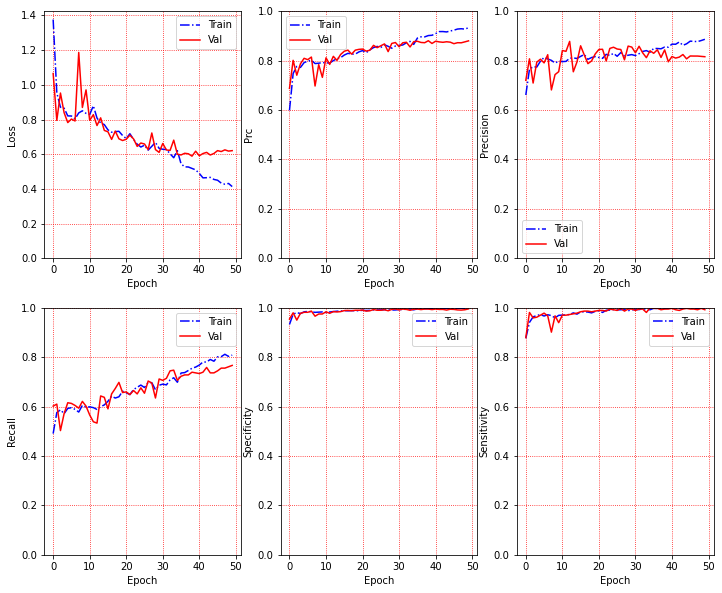

In [10]:
metrics_and_plots.plot_metrics(history)

In [13]:
train_predictions_baseline = model.predict(train_iterator, batch_size=64)
test_predictions_baseline = model.predict(test_iterator, batch_size=64)
y_test = to_categorical(test_iterator.labels)


In [14]:
baseline_results = model.evaluate(test_iterator,
                                  batch_size=64, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print('.......................................')

loss :  0.6990054249763489
tp :  263.0
fp :  64.0
tn :  1392.0
fn :  101.0
accuracy :  0.9093407392501831
precision :  0.8042813539505005
recall :  0.7225274443626404
auc :  0.946192741394043
prc :  0.8588293194770813
Specificity :  0.9924450516700745
Sensitivity :  0.9890109896659851
.......................................


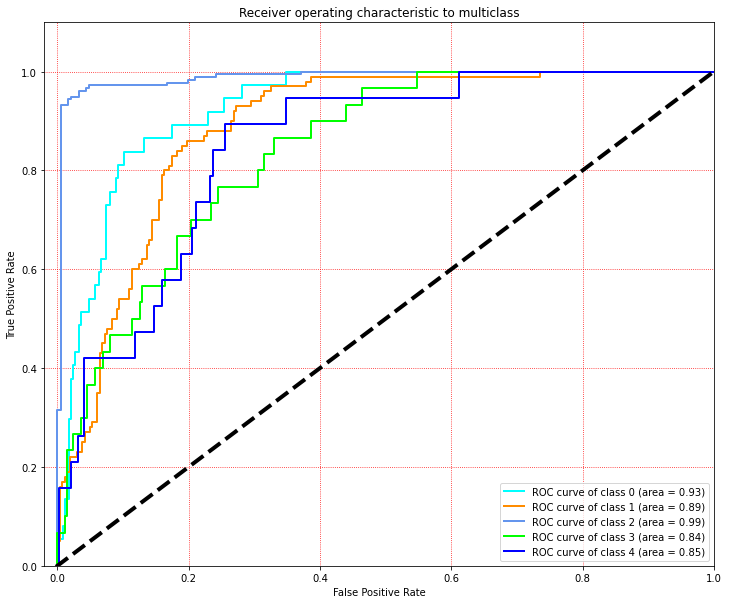

In [15]:
# Compute ROC curve and ROC area for each class

y_score = test_predictions_baseline
n_classes = 5
metrics_and_plots.plot_roc(y_test, y_score, 5)